### Mushroom Classification

In [1]:
# Operation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# PLotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

# Feature Selection
from sklearn.feature_selection import SelectFromModel

# Models
from sklearn.decomposition import PCA

# Approximation
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors

# Regression Based
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Tree Based
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.neighbors import KNeighborsClassifier

# Gradient Boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Neural Network

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


## Evaluation Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Reading Data from mushrooms.csv

In [2]:
df = pd.read_csv("../final2/mushrooms.csv")

print('Data Types')
print(df.dtypes)
print()
print('Sum of NaN')
print(df.isnull().sum())
print()
df.head()

Data Types
class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

Sum of NaN
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor    

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
df['veil-type'].unique()

array(['p'], dtype=object)

In [5]:
unle_df = df

### Label Encode the Value for Correlation 

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for feature in df.columns:
    df[feature] = le.fit_transform(df[feature])
 

In [7]:
X = df.drop(['class','veil-type'], axis=1)
y = df.iloc[:, 0]

print(X.shape, y.shape)

(8124, 21) (8124,)


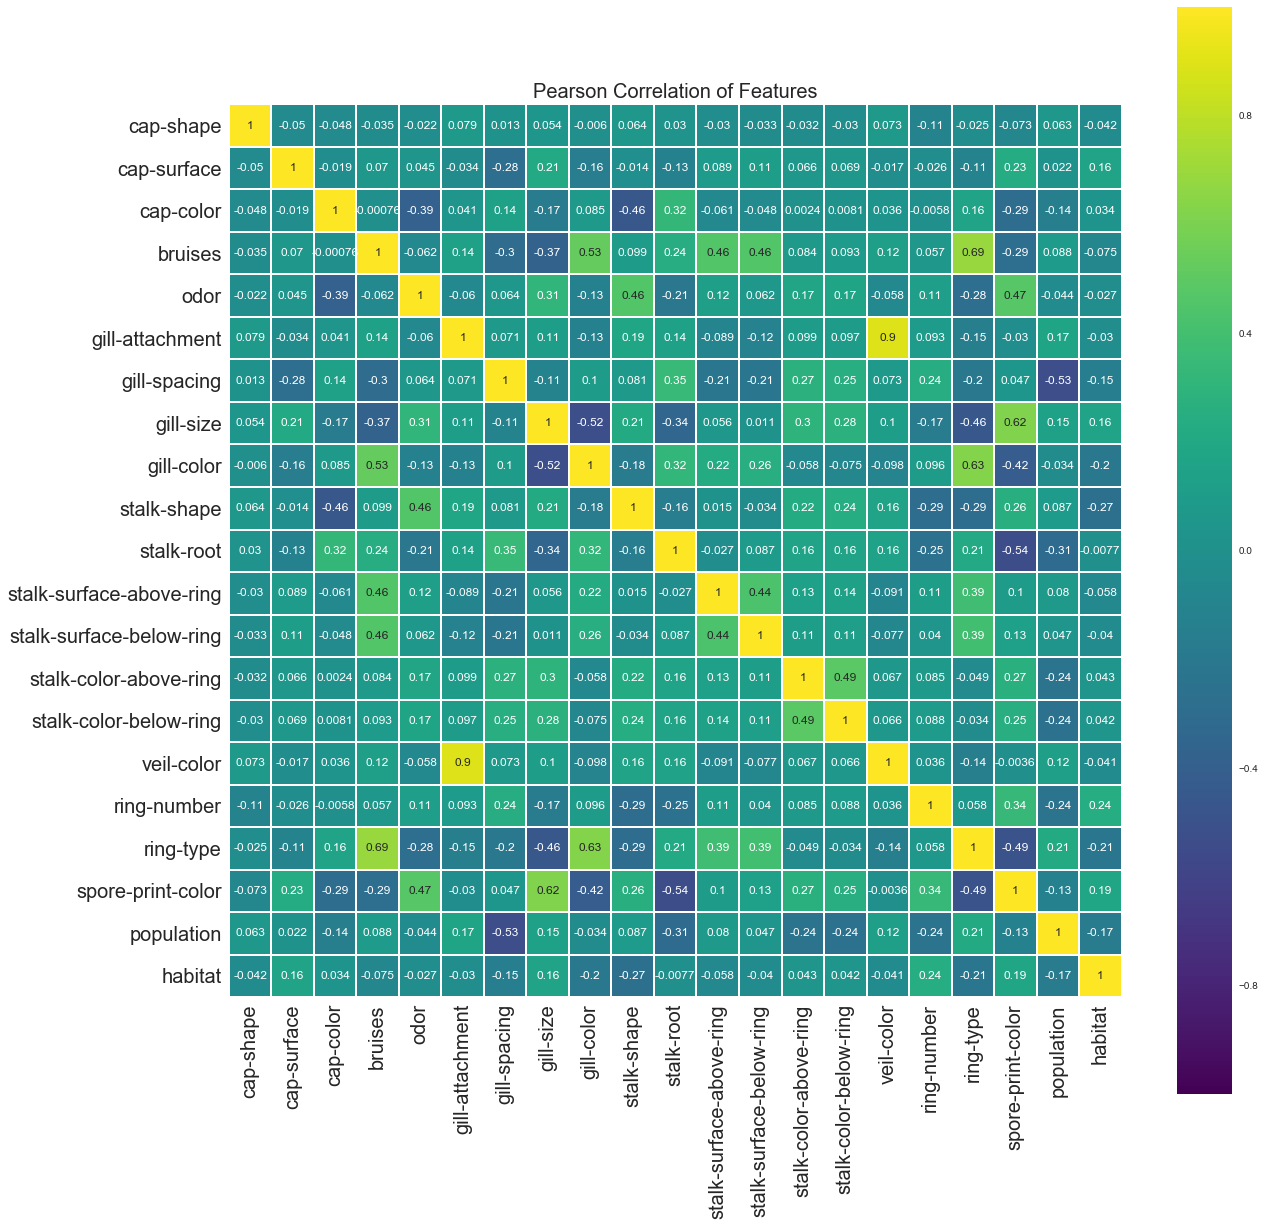

In [8]:
colormap = plt.cm.viridis
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', size=20)
g = sns.heatmap(X.corr(),linewidths=1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size":12})
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 20)
g.set_xticklabels(g.get_xticklabels(), rotation = 90, fontsize = 20);

### Modeling

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [10]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.4f}'
     .format(tree.score(X_train, y_train)))
print('Accuracy of Decision Treen classifier on test set: {:.4f}'
     .format(tree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.0000
Accuracy of Decision Treen classifier on test set: 1.0000


In [11]:
clf = LogisticRegression(C=0.01).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.4f}'
     .format(clf.score(X_test, y_test)))

clf = LogisticRegression(C=0.1).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.4f}'
     .format(clf.score(X_test, y_test)))

clf = LogisticRegression(C=1).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.4f}'
     .format(clf.score(X_test, y_test)))

clf = LogisticRegression(C=10).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.4f}'
     .format(clf.score(X_test, y_test)))

clf = LogisticRegression(C=100).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.4f}'
     .format(clf.score(X_test, y_test)))

clf = LogisticRegression(C=1000).fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.4f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.4f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.9168
Accuracy of Logistic regression classifier on test set: 0.9163
Accuracy of Logistic regression classifier on training set: 0.9421
Accuracy of Logistic regression classifier on test set: 0.9394
Accuracy of Logistic regression classifier on training set: 0.9481
Accuracy of Logistic regression classifier on test set: 0.9478
Accuracy of Logistic regression classifier on training set: 0.9514
Accuracy of Logistic regression classifier on test set: 0.9473
Accuracy of Logistic regression classifier on training set: 0.9641
Accuracy of Logistic regression classifier on test set: 0.9611
Accuracy of Logistic regression classifier on training set: 0.9690
Accuracy of Logistic regression classifier on test set: 0.9641


In [12]:
clfrbf= SVC(kernel='rbf', C=1).fit(X_train, y_train)

print('Accuracy of SVC rbf classifier on training set: {:.4f}'
     .format(clfrbf.score(X_train, y_train)))
print('Accuracy of SVC rbf classifier on test set: {:.4f}'
     .format(clfrbf.score(X_test, y_test)))

print()

clflinear= LinearSVC(C=1).fit(X_train, y_train)
print('Accuracy of SVC linear classifier on training set: {:.4f}'
     .format(clflinear.score(X_train, y_train)))
print('Accuracy of SVC linear classifier on test set: {:.4f}'
     .format(clflinear.score(X_test, y_test)))

Accuracy of SVC rbf classifier on training set: 0.9613
Accuracy of SVC rbf classifier on test set: 0.9636

Accuracy of SVC linear classifier on training set: 0.9455
Accuracy of SVC linear classifier on test set: 0.9424


In [13]:
mlp = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 11,
                   random_state = 0, solver='lbfgs').fit(X_train, y_train)
print('Accuracy of MLP classifier on training set: {:.4f}'
     .format(mlp.score(X_train, y_train)))
print('Accuracy of MLP classifier on test set: {:.4f}'
     .format(mlp.score(X_test, y_test)))

Accuracy of MLP classifier on training set: 1.0000
Accuracy of MLP classifier on test set: 1.0000


In [14]:
RFC = RandomForestClassifier(random_state=0).fit(X_train, y_train)

print('Accuracy of Random Forest on training set: {:.4f}'
     .format(RFC.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.4f}'
     .format(RFC.score(X_test, y_test)))

Accuracy of Random Forest on training set: 1.0000
Accuracy of Random Forest classifier on test set: 1.0000


In [15]:
abt = AdaBoostClassifier(base_estimator=None, n_estimators=100).fit(X_train, y_train)

print('Accuracy of AdaBoost on training set: {:.4f}'
     .format(abt.score(X_train, y_train)))
print('Accuracy of AdaBoost classifier on test set: {:.4f}'
     .format(abt.score(X_test, y_test)))

Accuracy of AdaBoost on training set: 1.0000
Accuracy of AdaBoost classifier on test set: 1.0000


In [16]:
GNB = GradientBoostingClassifier().fit(X_train, y_train)

print('Accuracy of GradientBoosting on training set: {:.4f}'
     .format(abt.score(X_train, y_train)))
print('Accuracy of GradientBoosting classifier on test set: {:.4f}'
     .format(abt.score(X_test, y_test)))

Accuracy of GradientBoosting on training set: 1.0000
Accuracy of GradientBoosting classifier on test set: 1.0000


### Using PCA to find the first two principal components of the mushroom dataset

(8124, 21) (8124,)


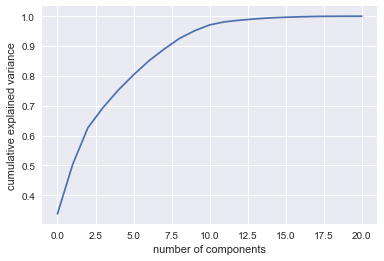

In [17]:
X1 = unle_df.drop(['class','veil-type'], axis=1)
y1 = unle_df.iloc[:, 0]

print(X1.shape, y1.shape)

pca = PCA().fit(X1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [18]:
X_normalized = StandardScaler().fit(X1).transform(X1)  

pca = PCA(n_components = 2).fit(X_normalized)

X_pca = pca.transform(X_normalized)
print(X1.shape, X_pca.shape)

(8124, 21) (8124, 2)


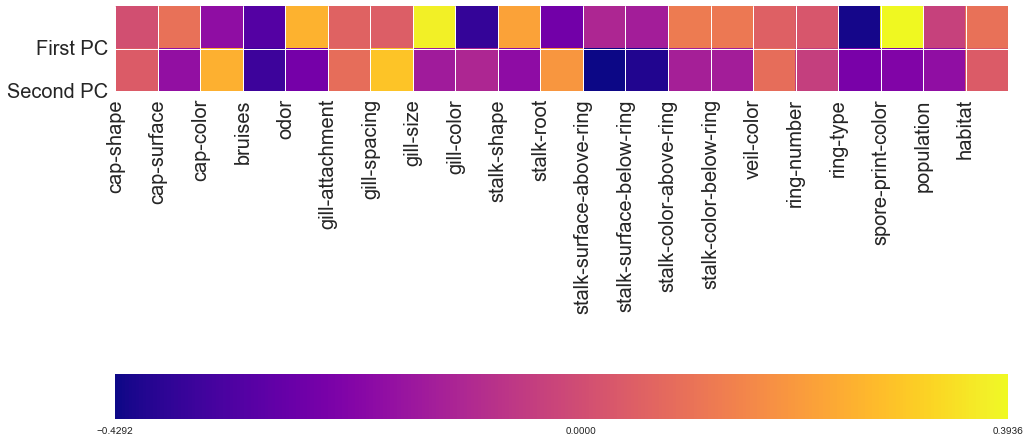

In [19]:
fig = plt.figure(figsize=(16, 8))
plt.imshow(pca.components_, interpolation = 'none', cmap = 'plasma')
feature_names = list(X.columns)

plt.gca().set_xticks(np.arange(-.5, len(feature_names)));
plt.gca().set_yticks(np.arange(0.5, 2));
plt.gca().set_xticklabels(feature_names, rotation=90, ha='center', fontsize=20);
plt.gca().set_yticklabels(['First PC', 'Second PC'], va='center', fontsize=20);

plt.colorbar(orientation='horizontal', ticks=[pca.components_.min(), 0, 
                                              pca.components_.max()], pad=0.65);

### Using PCA to find the appropriate principal components of the mushroom dataset

(8124, 21) (8124,)
original shape:    (6093, 21)
transformed shape: (6093, 11)
(8124, 21) (8124, 2)


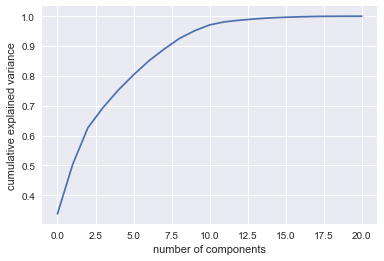

In [24]:
X1 = unle_df.drop(['class','veil-type'], axis=1)
y1 = unle_df.iloc[:, 0]

print(X1.shape, y1.shape)

pca = PCA().fit(X1)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

X_train, X_test, y_train, y_test = train_test_split(X1, y1,random_state=0)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

pca = PCA(n_components=11)

X_trainpca = pca.fit_transform(X_train)
X_testpca  = pca.transform(X_test)

print("original shape:   ", X_train.shape)
print("transformed shape:", X_trainpca.shape)
print(X1.shape, X_pca.shape)

In [43]:
lrclf1 = LogisticRegression(C=1).fit(X_trainpca, y_train)
print('Accuracy of Logistic regression classifier on training set with PCA: {:.4f}'
     .format(lrclf1.score(X_trainpca, y_train)))
print('Accuracy of Logistic regression classifier on test set with PCA: {:.4f}'
     .format(lrclf1.score(X_testpca, y_test)))

knn = KNeighborsClassifier().fit(X_trainpca, y_train)
print('Accuracy of KNN classifier on training set with PCA: {:.4f}'
     .format(knn.score(X_trainpca, y_train)))
print('Accuracy of KNN classifier on test set with PCA: {:.4f}'
     .format(knn.score(X_testpca, y_test)))

clfrbf= SVC(kernel='rbf', C=1).fit(X_trainpca, y_train)
print('Accuracy of SVC rbf classifier on training set with PCA: {:.4f}'
     .format(clfrbf.score(X_trainpca, y_train)))
print('Accuracy of SVC rbf classifier on test set with PCA: {:.4f}'
     .format(clfrbf.score(X_testpca, y_test)))

Accuracy of Logistic regression classifier on training set with PCA: 0.9332
Accuracy of Logistic regression classifier on test set with PCA: 0.9345
Accuracy of KNN classifier on training set with PCA: 0.9998
Accuracy of KNN classifier on test set with PCA: 0.9995
Accuracy of SVC rbf classifier on training set with PCA: 0.9751
Accuracy of SVC rbf classifier on test set with PCA: 0.9744


In [27]:
# accuracy is the default scoring metric
print('Cross-validation (accuracy)', cross_val_score(lrclf1, X, y, cv=5))
# use AUC as scoring metric
print('Cross-validation (AUC)', cross_val_score(lrclf1, X, y, cv=5, scoring = 'roc_auc'))
# use recall as scoring metric
print('Cross-validation (recall)', cross_val_score(lrclf1, X, y, cv=5, scoring = 'recall'))
# use precision as scoring metric
print('Cross-validation (precision)', cross_val_score(lrclf1, X, y, cv=5, scoring = 'precision'))

Cross-validation (accuracy) [ 0.64206642  0.984       0.87569231  0.99815271  0.71982759]
Cross-validation (AUC) [ 0.66334559  0.99684507  0.82973398  0.999183    0.68281542]
Cross-validation (recall) [ 0.55612245  0.98212005  0.74201788  0.99872286  0.94636015]
Cross-validation (precision) [ 0.65074627  0.98463508  1.          0.99744898  0.64211438]


### With help from Liang Wei code from Titanic Set, to find the highest Recall

In [28]:
def algo_runner(model):
    clf = model
    clf.fit(X_train, y_train)
    score_train = clf.score(X_train, y_train)
    score_test = clf.score(X_test, y_test)

    y_train_score_classifier = clf.predict_proba(X_train)
    y_test_score_classifier = clf.predict_proba(X_test)

    yfit_train = clf.predict(X_train)
    yfit_test = clf.predict(X_test)

    mat_train = confusion_matrix(y_train, yfit_train)
    mat_test = confusion_matrix(y_test, yfit_test)

    Precision_train = precision_score(y_train,yfit_train)
    Precision_test =  precision_score(y_test,yfit_test)

    Recall_train = recall_score(y_train,yfit_train)
    Recall_test = recall_score(y_test,yfit_test)

    f1_score_train = f1_score(y_train,yfit_train)
    f1_score_test = f1_score(y_test,yfit_test)

    AUC_Train = roc_auc_score(y_train,y_train_score_classifier[:,1])
    AUC_Test = roc_auc_score(y_test,y_test_score_classifier[:,1])

    print("________________________________")

    print("Train {} = {}" .format('score',  score_train))
    print("Test  {} = {}" .format('score',  score_test))
    print()

    print("Train {} = \n{}" .format('confusion matrix',  mat_train.T))
    print("Test  {} = \n{}" .format('confusion matrix',  mat_test.T))
    print()

    print("Train {} = {}" .format('Precision',  Precision_train))
    print("Test  {} = {}" .format('Precision',  Precision_test))
    print()

    print("Train {} = {}" .format('Recall',  Recall_train))
    print("Test  {} = {}" .format('Recall',  Recall_test))
    print()

    print("Train {} = {}" .format('F1 Score',  f1_score_train))
    print("Test  {} = {}" .format('F1 Score',  f1_score_test))
    print()

    print("Train {} = {}" .format('AUC Score',  AUC_Train))
    print("Test  {} = {}" .format('AUC Score',  AUC_Test))
    print()

In [29]:
def algo_runner(algorithms):
    for algo in algorithms:
        clf = algorithms[algo]
        clf.fit(X_train, y_train)
        score_train = clf.score(X_train, y_train)
        score_test = clf.score(X_test, y_test)

        y_train_score_classifier = clf.predict_proba(X_train)
        y_test_score_classifier = clf.predict_proba(X_test)

        yfit_train = clf.predict(X_train)
        yfit_test = clf.predict(X_test)

        mat_train = confusion_matrix(y_train, yfit_train)
        mat_test = confusion_matrix(y_test, yfit_test)

        Precision_train = precision_score(y_train,yfit_train)
        Precision_test =  precision_score(y_test,yfit_test)
        
        Recall_train = recall_score(y_train,yfit_train)
        Recall_test = recall_score(y_test,yfit_test)

        f1_score_train = f1_score(y_train,yfit_train)
        f1_score_test = f1_score(y_test,yfit_test)

        AUC_Train = roc_auc_score(y_train,y_train_score_classifier[:,1])
        AUC_Test = roc_auc_score(y_test,y_test_score_classifier[:,1])

        print("________________________")
        print("\n",Bold,Underline,"{} -".format(algo), end )
        print("{}".format(algo))
        print("Train {} = {}" .format('score',  score_train))
        print("Test  {} = {}" .format('score',  score_test))
        print()

        print("Train {} = \n{}" .format('confusion matrix',  mat_train.T))
        print("Test  {} = \n{}" .format('confusion matrix',  mat_test.T))
        print()

        print("Train {} = {}" .format('Precision',  Precision_train))
        print("Test  {} = {}" .format('Precision',  Precision_test))
        print()
        
        print("Train {} = {}" .format('Recall',  Recall_train))
        print("Test  {} = {}" .format('Recall',  Recall_test))
        print()

        print("Train {} = {}" .format('F1 Score',  f1_score_train))
        print("Test  {} = {}" .format('F1 Score',  f1_score_test))
        print()

        print("Train {} = {}" .format('AUC Score',  AUC_Train))
        print("Test  {} = {}" .format('AUC Score',  AUC_Test))
        print()

        model_list.append(algo)
        score_train_list.append(score_train)
        score_test_list.append(score_test)
        mat_train_list.append(mat_train.T)
        mat_test_list.append(mat_test.T)
        Precision_train_list.append(Precision_train)
        Precision_test_list.append(Precision_test)
        Recall_train_list.append(Recall_train)
        Recall_test_list.append(Recall_test)
        f1_score_train_list.append(f1_score_train)
        f1_score_test_list.append(f1_score_test)
        AUC_Train_list.append(AUC_Train)
        AUC_Test_list.append(AUC_Test)

In [30]:
algorithms = {
    "DecisionTree": DecisionTreeClassifier(max_depth=10, class_weight='balanced'),
    "Logistic"    : LogisticRegressionCV(cv=20, class_weight='balanced'),
    "SVM" : SVC(class_weight="balanced", probability=True),
    'Neural Network' : MLPClassifier(hidden_layer_sizes=[100,100]),
    "Extra_tree" : ExtraTreesClassifier(),
    "GradientBoosting" : GradientBoostingClassifier(n_estimators=50),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "RandomForest": RandomForestClassifier(n_estimators=50, class_weight='balanced')
    }

Bold = "\033[1m"
Underline = "\033[4m"
end = "\033[0;0m"

model_list = []
score_train_list = []
score_test_list = []
mat_train_list = []  
mat_test_list = [] 
Precision_train_list = []
Precision_test_list = []
Recall_train_list = []
Recall_test_list = []
f1_score_train_list = []
f1_score_test_list = []
AUC_Train_list = []
AUC_Test_list = []


algo_runner(algorithms)

model_performance = pd.DataFrame({
    'model' : model_list,
    'score_train_list' : score_train_list,
    'score_test_list' : score_test_list,
    'mat_train_list' : mat_train_list,
    'mat_test_list' : mat_test_list,
    'Precision_train_list' : Precision_train_list,
    'Precision_test_list' : Precision_test_list,
    'Recall_train_list' : Recall_train_list,
    'Recall_test_list' : Recall_test_list,
    'f1_score_train_list' : f1_score_train_list,
    'f1_score_test_list' : f1_score_test_list,
    'AUC_Train_list' : AUC_Train_list,
    'AUC_Test_list' : AUC_Test_list})

________________________

   DecisionTree - 
DecisionTree
Train score = 1.0
Test  score = 1.0

Train confusion matrix = 
[[3147    0]
 [   0 2946]]
Test  confusion matrix = 
[[1061    0]
 [   0  970]]

Train Precision = 1.0
Test  Precision = 1.0

Train Recall = 1.0
Test  Recall = 1.0

Train F1 Score = 1.0
Test  F1 Score = 1.0

Train AUC Score = 1.0
Test  AUC Score = 1.0

________________________

   Logistic - 
Logistic
Train score = 0.9698014114557689
Test  score = 0.96602658788774

Train confusion matrix = 
[[3049   86]
 [  98 2860]]
Test  confusion matrix = 
[[1027   35]
 [  34  935]]

Train Precision = 0.966869506423259
Test  Precision = 0.9649122807017544

Train Recall = 0.9708078750848609
Test  Recall = 0.9639175257731959

Train F1 Score = 0.9688346883468835
Test  F1 Score = 0.964414646725116

Train AUC Score = 0.990777539833085
Test  AUC Score = 0.9903563065382784

________________________

   SVM - 
SVM
Train score = 0.9612670277367471
Test  score = 0.9635647464303299

Train co

In [31]:
model_performance.loc[:,['model',
                         'score_train_list',
                         'score_test_list',
                         'mat_train_list',
                         'mat_test_list',
                         'Precision_train_list',
                         'Precision_test_list',
                         'Recall_train_list',
                         'Recall_test_list',
                         'f1_score_train_list',
                         'f1_score_test_list',
                         'AUC_Train_list',
                         'AUC_Test_list']].T

,0,1,2,3,4,5,6,7
model,DecisionTree,Logistic,SVM,Neural Network,Extra_tree,GradientBoosting,AdaBoost,RandomForest
score_train_list,1,0.969801,0.961267,1,1,0.998687,1,1
score_test_list,1,0.966027,0.963565,1,1,1,1,1
mat_train_list,"[[3147, 0], [0, 2946]]","[[3049, 86], [98, 2860]]","[[3033, 122], [114, 2824]]","[[3147, 0], [0, 2946]]","[[3147, 0], [0, 2946]]","[[3147, 8], [0, 2938]]","[[3147, 0], [0, 2946]]","[[3147, 0], [0, 2946]]"
mat_test_list,"[[1061, 0], [0, 970]]","[[1027, 35], [34, 935]]","[[1025, 38], [36, 932]]","[[1061, 0], [0, 970]]","[[1061, 0], [0, 970]]","[[1061, 0], [0, 970]]","[[1061, 0], [0, 970]]","[[1061, 0], [0, 970]]"
Precision_train_list,1,0.96687,0.961198,1,1,1,1,1
Precision_test_list,1,0.964912,0.96281,1,1,1,1,1
Recall_train_list,1,0.970808,0.958588,1,1,0.997284,1,1
Recall_test_list,1,0.963918,0.960825,1,1,1,1,1
f1_score_train_list,1,0.968835,0.959891,1,1,0.99864,1,1


### Decision tree is the simplest model for this dataset with highest accuracy

In [35]:
X.columns.tolist()

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [36]:
tree.feature_importances_.tolist()

[0.0,
 0.0039432375708414,
 0.0028633558913744397,
 0.03100931692177393,
 0.0,
 0.0,
 0.0,
 0.13267738849491245,
 0.34365231175408817,
 0.023746039190869456,
 0.047195332786092094,
 0.0,
 0.0019454210948664022,
 0.01767864700810728,
 0.0,
 0.003708985833959731,
 0.0013698600860650573,
 0.0,
 0.20029239390693243,
 0.17547051468828323,
 0.014447194771833973]

In [41]:
pd.DataFrame({"var": X.columns.tolist(), "coef" :tree.feature_importances_.tolist() }).sort_values('coef', ascending=False)

,coef,var
8,0.343652,gill-color
18,0.200292,spore-print-color
19,0.175471,population
7,0.132677,gill-size
10,0.047195,stalk-root
3,0.031009,bruises
9,0.023746,stalk-shape
13,0.017679,stalk-color-above-ring
20,0.014447,habitat
1,0.003943,cap-surface
